# Q1

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cmath import exp, pi

# Part 1

In [3]:
def fft(x):
    N = x.shape[0]
    if N <= 1: 
        return x
    f1 = fft(x[::2])
    f2 =  fft(x[1::2])
    even = list(f1)
    odd = list(f2)
    T = [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    out = [even[k] + T[k] for k in range(N//2)] + \
          [even[k]- T[k] for k in range(N//2)]
    out1 = np.array(out)
    return out1

x = np.array([1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0])
print(fft(x))

[4.+0.j         1.-2.41421356j 0.+0.j         1.-0.41421356j
 0.+0.j         1.+0.41421356j 0.+0.j         1.+2.41421356j]


# Part 2

True


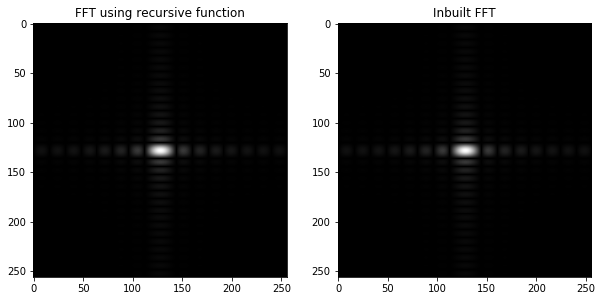

In [4]:
def fft2(x):
    x = np.apply_along_axis(fft, 0, x)
    x = np.apply_along_axis(fft, 1, x)
    fshift = np.fft.fftshift(x)
    out = abs(fshift)
    return out

x = cv2.imread('../input_data/rectangle.jpg', 0)
out = fft2(x)
out1 = abs(np.fft.fftshift(np.fft.fft2(x)))

print(np.allclose(out1,out))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(out, cmap='gray')
plt.title("FFT using recursive function")
plt.subplot(122)
plt.imshow(out1, cmap='gray')
plt.title("Inbuilt FFT")
plt.show()